**Tools - Matplotlib**

*Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc.*

In [0]:
import matplotlib
import matplotlib.pyplot as plt

# matplotlib.use("TKAgg") 
# uncomment this line in your program 
# if you want to use Tk as your graphics backend.

In [2]:
print(plt.style.available)

# plt.style.use('ggplot')

['fast', '_classic_test', 'ggplot', 'classic', 'seaborn-poster', 'fivethirtyeight', 'grayscale', 'seaborn', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-bright', 'seaborn-paper', 'dark_background', 'seaborn-notebook', 'bmh', 'seaborn-muted', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-deep', 'seaborn-pastel', 'seaborn-white', 'seaborn-darkgrid', 'seaborn-whitegrid', 'Solarize_Light2', 'seaborn-ticks']


Matplotlib uses matplotlibrc configuration files to customize all kinds of properties 
(figure size, line width, color and style, axis and grid properties, text and font properties), 
which we call rc settings or rc parameters

In [0]:
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

When running python using the command line, the graphs are typically shown in a separate window.
In a Jupyter notebook, we can simply output the graphs within the notebook itself by running the %matplotlib inline magic command.

In [0]:
%matplotlib inline

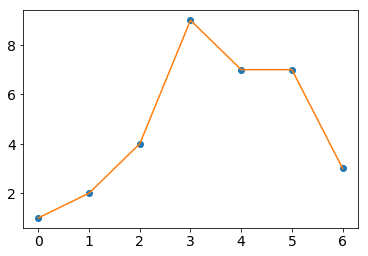

In [6]:
plt.plot([1, 2, 4, 9, 7, 7, 3], 'o')
plt.plot([1, 2, 4, 9, 7, 7, 3])
# same as plt.plot(range(6), [1, 2, 4, 9, 7, 7, 3])

# Display a figure. When running in ipython with its pylab mode, 
# display all figures and return to the ipython prompt.
plt.show()

If the plot function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate. You can also provide two arrays: one for the horizontal axis x, and the second for the vertical axis y:

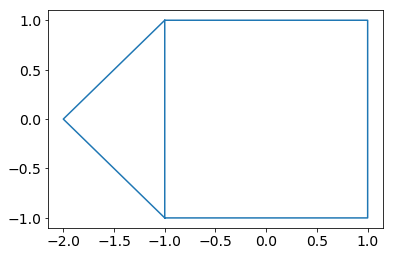

In [6]:
# x and y must have same first dimension
plt.plot([-1, -1, 1, 1, -1, -2, -1], [-1, 1, 1, -1, -1, 0, 1])
plt.show()

The axes automatically match the extent of the data. We would like to give the graph a bit more room, so let's call the axis function to change the extent of each axis [xmin, xmax, ymin, ymax].

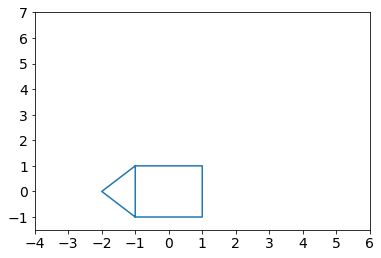

In [7]:
xx = [-1, -1, 1, 1, -1, -2, -1]
yy = [-1, 1, 1, -1, -1, 0, 1]

plt.plot(xx, yy)

# change the extent of each axis 
plt.axis([-4, 6, -1.5, 7])

plt.xticks(range(-4, 7, 1))
plt.yticks(range(-1, 8, 1))

plt.show()

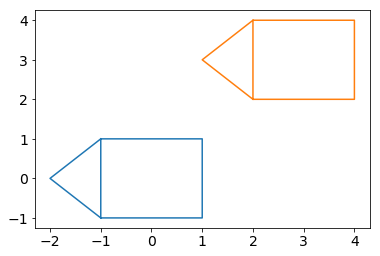

In [9]:
# Drawing multiple graphs on the same figure

plt.plot(xx, yy)

# plt.figure()

plt.plot([x+3 for x in xx], [y+3 for y in yy])

plt.show()

Now, let's plot a mathematical function. We use NumPy's linspace function to create an array x containing 1000 floats ranging from -2 to 2, then we create a second array y computed as the square of x

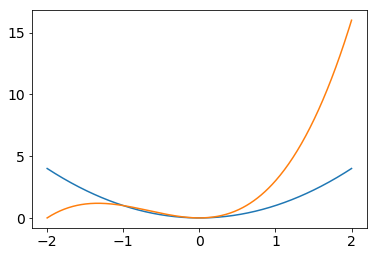

In [11]:
import numpy as np

num_points = 500
# num_points = 5

# Return evenly spaced numbers over the specified interval
x = np.linspace(-2, 2, num_points)

y = x**2
y2 = x**3 + 2 * x**2

plt.plot(x, y)
plt.plot(x, y2)

plt.show()

That's a bit dry, let's add a title, and x and y labels, and draw a grid.

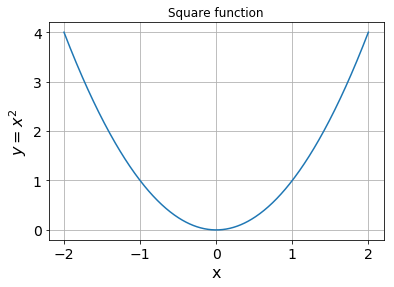

In [12]:
plt.plot(x, y)
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("$y = x^2$")  # TeX Math expressions
plt.grid(True)
plt.show()

You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles. Check out the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for the full list of style & color options.

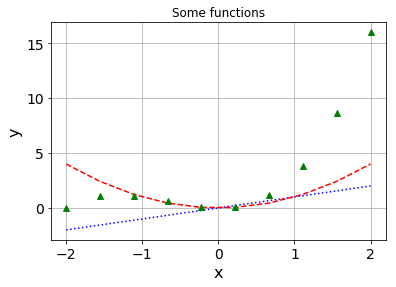

In [11]:
plt.plot(x, x, "b:", x, y, "r--", x, y2, "g^")
plt.title("Some functions")
plt.xlabel("x")
plt.ylabel("y")  # TeX Math expressions
plt.grid(True)
plt.show()

The plot function returns a list of Line2D objects (one for each line). You can set extra attributes on these lines, such as the line width, the dash style or the alpha level. See the full list of attributes in the [documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties).

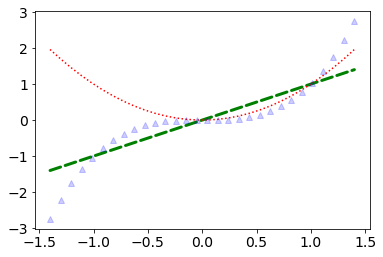

In [12]:
x = np.linspace(-1.4, 1.4, 30)

# list of line objects
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')

line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

Saving a figure to disk is as simple as calling savefig with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

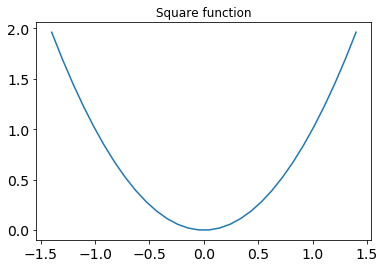

In [13]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.title("Square function")
plt.savefig("my_square_function.png", transparent=True)

# Subplots

A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the subplot function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling plt.gca()), so when you call the plot function, it draws on the active subplot.

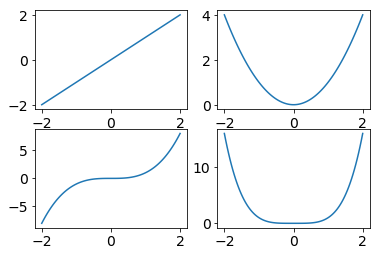

In [14]:
x = np.linspace(-2, 2, 100)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show()

If you need more complex subplot positionning, you can use subplot2grid instead of subplot. You specify the number of rows and columns in the grid, then your subplot's position in that grid (top-left = (0,0)), and optionally how many rows and/or columns it spans. For example:

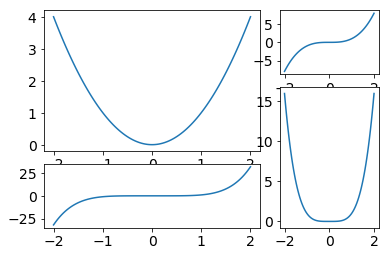

In [15]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

# Multiple figures
It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates figure(1) automatically. When you switch figure, pyplot keeps track of the currently active figure (which you can get a reference to by calling plt.gcf()), and the active subplot of that figure becomes the current subplot.

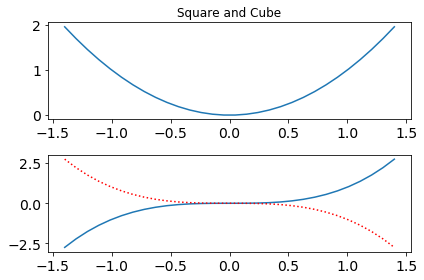

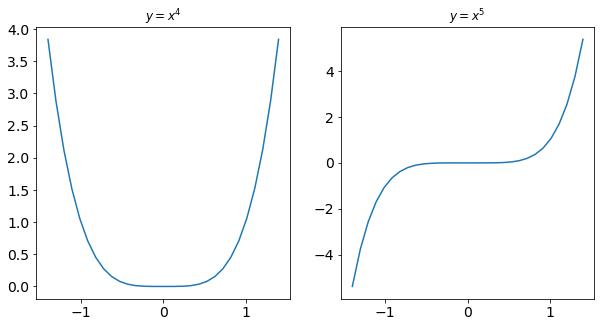

In [16]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(2, 1, 2)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, x**4)
plt.title("$y = x^4$")
plt.subplot(1, 2, 2)
plt.plot(x, x**5)
plt.title("$y = x^5$")

plt.figure(1)      # back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, "r:")

# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()

plt.show()

__Exercise__: Plot on the same figure the following functions for input parameter between $-2$ and $2$:

$$F(x) = \sin(3x^2)$$
$$G(x) = \frac{\cos(5x^2)}{2}$$

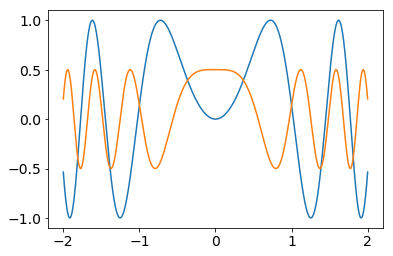

In [19]:
x = np.linspace(-2, 2, 1000)
plt.plot(x, np.sin(3*x**2), x, 0.5*np.cos(5*x**2))

plt.show()

# Drawing text
You can call text to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes. Any text in matplotlib may contain TeX equation expressions, see the [documentation](http://matplotlib.org/users/mathtext.html) for more details.

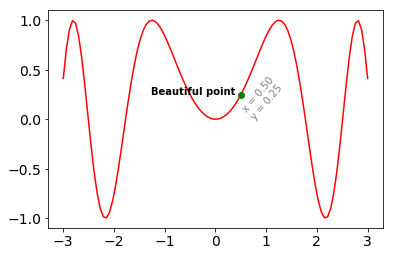

In [18]:
def my_func(x):
    return np.sin(x**2)

x = np.linspace(-3, 3, 100)
px = 0.5
py = my_func(px)

y = list(map(my_func, x))

plt.plot(x, y, "r-", px, py, "go")

plt.text(px - 0.1, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show()

- Note: ha is an alias for horizontalalignment

For more text properties, visit the documentation.

It is quite frequent to annotate elements of a graph, such as the beautiful point above. The annotate function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

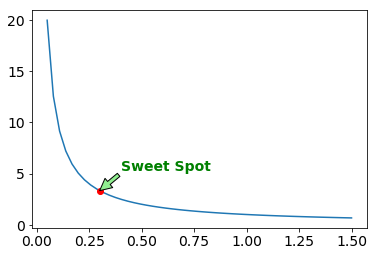

In [19]:
def my_func(x):
    return 1/x


x = np.linspace(0.05, 1.5, 50)
px = 0.3
py = my_func(px)

y = list(map(my_func, x))

plt.plot(x, y, px, py, "ro")
plt.annotate("Sweet Spot", xy=(px, py), xytext=(px+0.1,py+2),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.show()

You can also add a bounding box around your text by using the bbox attribute:

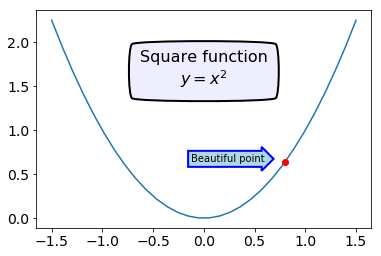

In [20]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=0.75,rounding_size=0.25", 
                  ec="black", fc="#EEEEFF", lw=2)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=16, 
         color='black', ha="center", bbox=bbox_props)

plt.show()

Just for fun, if you want an xkcd-style plot, just draw within a with plt.xkcd() section:

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


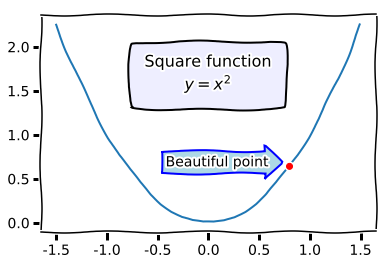

In [21]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", 
                      ec="black", fc="#EEEEFF", lw=2)
    
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=16, 
             color='black', ha="center", bbox=bbox_props)

    plt.show()

In [0]:
plt.rcdefaults()

# Legends

The simplest way to add a legend is to set a label on all lines, then just call the legend function.

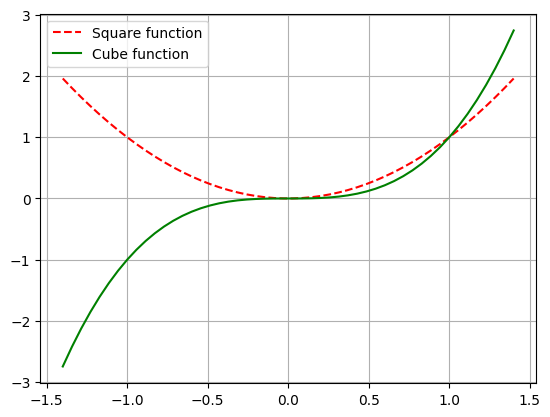

In [27]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Non linear scales
Matplotlib supports non linear scales, such as logarithmic or logit scales.

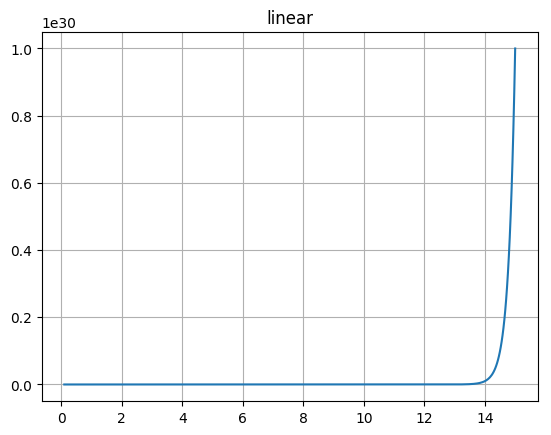

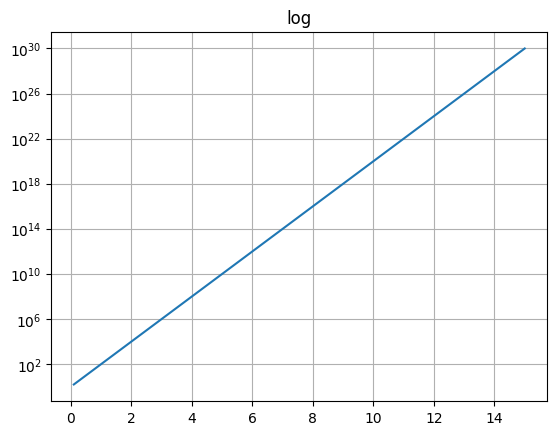

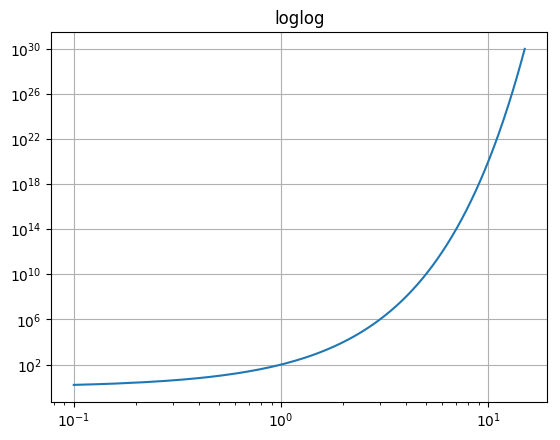

In [24]:
x = np.linspace(0.1, 15, 500)
# y = x**3/np.exp(2*x)
y = 10**(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.figure(3)
plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')
plt.title('loglog')
plt.grid(True)


# # symmetrical log allows both positive and negative values
# plt.figure(4)
# plt.plot(x, y - y.mean())
# plt.yscale('symlog', linthreshy=0.05)
# plt.title('symlog')
# plt.grid(True)

plt.show()

# Two Scales

New axes are generated by calling the `Axes.twinx` method.  Likewise,
`Axes.twiny` is available to generate axes that share a *y* axis but
have different top and bottom scales.

The twinx and twiny methods are also exposed as pyplot functions.

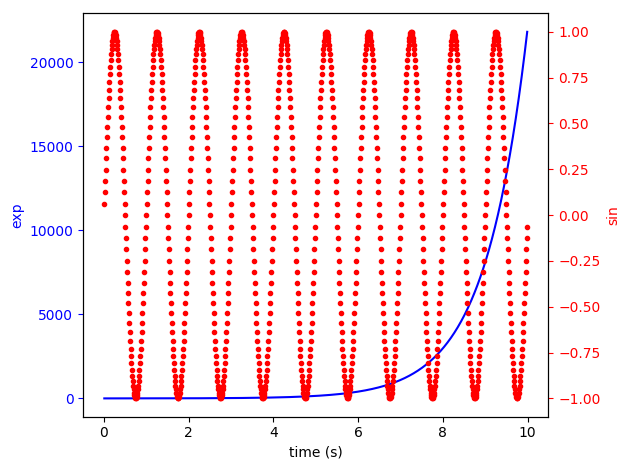

In [25]:
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = np.sin(2 * np.pi * t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

The axes have little marks called "ticks". To be precise, "ticks" are the locations of the marks (eg. (-1, 0, 1)), "tick lines" are the small lines drawn at those locations, "tick labels" are the labels drawn next to the tick lines, and "tickers" are objects that are capable of deciding where to place ticks. The default tickers typically do a pretty good job at placing ~5 to 8 ticks at a reasonable distance from one another.

But sometimes you need more control (eg. there are too many tick labels on the logit graph above). Fortunately, matplotlib gives you full control over ticks. You can even activate minor ticks.

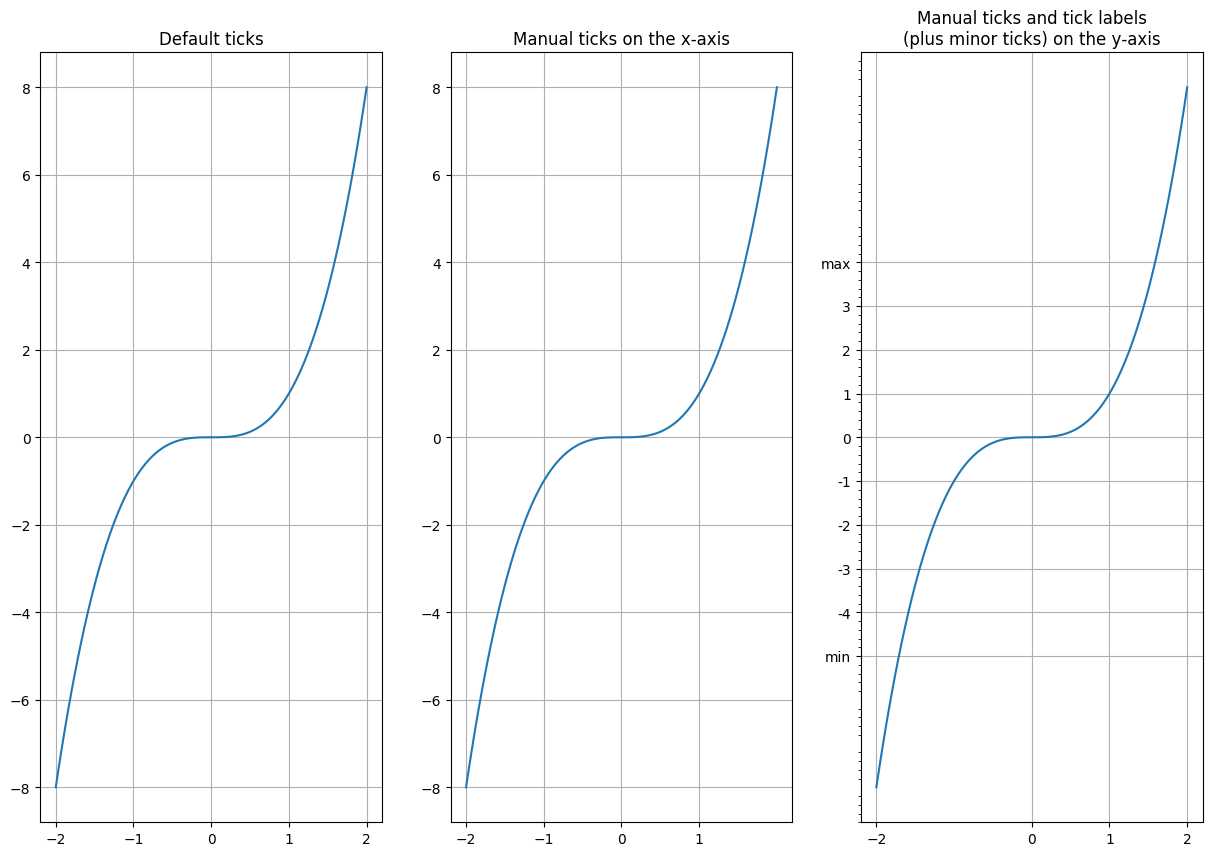

In [26]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("Default ticks")

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom='off')
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")


plt.grid(True)

plt.show()

# Scatter plot
To draw a scatter plot, simply provide the x and y coordinates of the points.

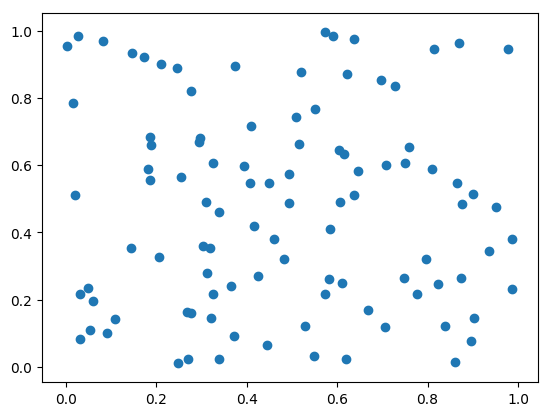

In [31]:
from numpy.random import rand

x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

You may also optionally provide the scale of each point.

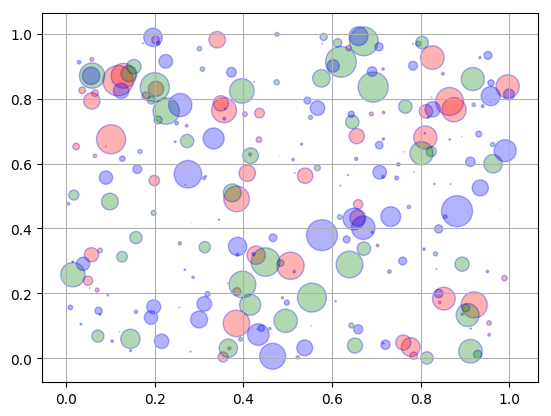

In [28]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()

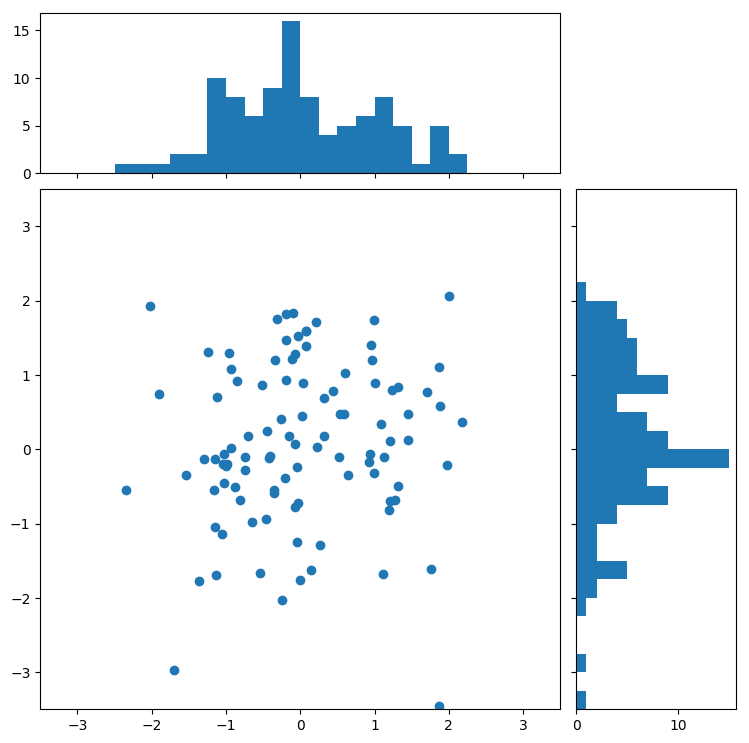

In [32]:
from matplotlib.ticker import NullFormatter

# the random data
x = np.random.randn(100)
y = np.random.randn(100)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

# Lines
You can draw lines simply using the plot function, as we have done so far. However, it is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept. You can also use the hlines and vlines functions that plot horizontal and vertical line segments. For example:

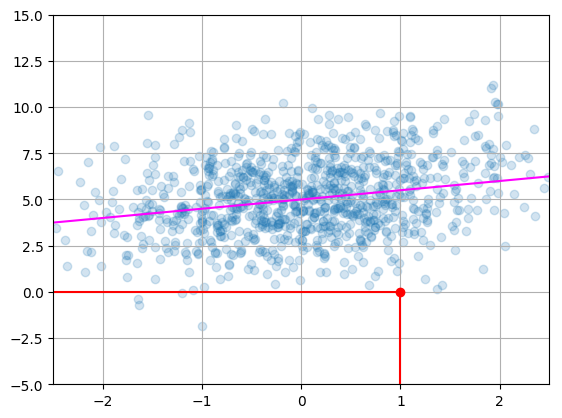

In [30]:
from numpy.random import randn

def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

x = randn(1000)
y = 0.5*x + 5 + randn(1000)*2
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plt.plot(1, 0, "ro")
plt.vlines(1, -5, 0, color="red")
plt.hlines(0, -2.5, 1, color="red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)
plt.show()

# 3D projection
Plotting 3D graphs is quite straightforward. You need to import Axes3D, which registers the "3d" projection. Then create a subplot setting the projection to "3d". This returns an Axes3DSubplot object, which you can use to call plot_surface, giving x, y, and z coordinates, plus optional attributes.

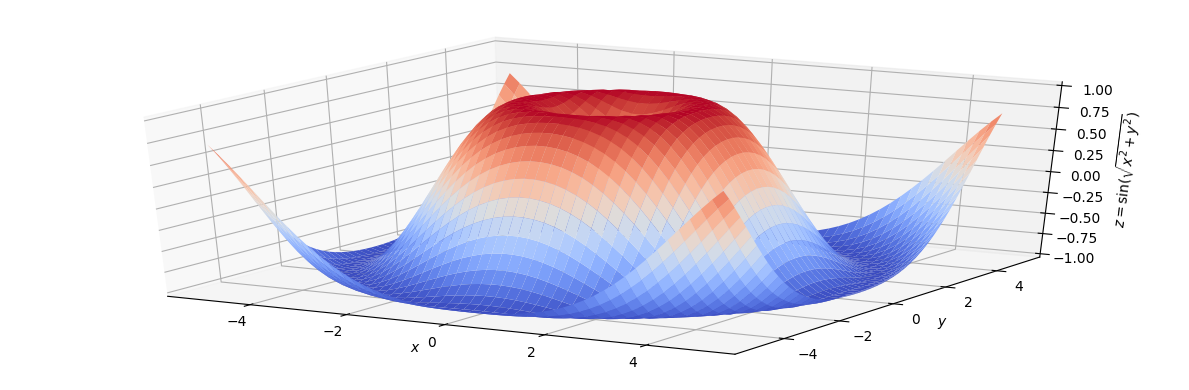

In [31]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

# Create a mesh in the cartesian system
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')

# Plot the surface
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)

# Tweak the limits and add latex math labels
subplot3d.set_zlim(-1, 1)
subplot3d.set_xlabel(r'$x$')
subplot3d.set_ylabel(r'$y$')
subplot3d.set_zlabel(r'$z=\sin(\sqrt{x^2 + y^2})$')

figure.tight_layout()

plt.show()

# Histograms

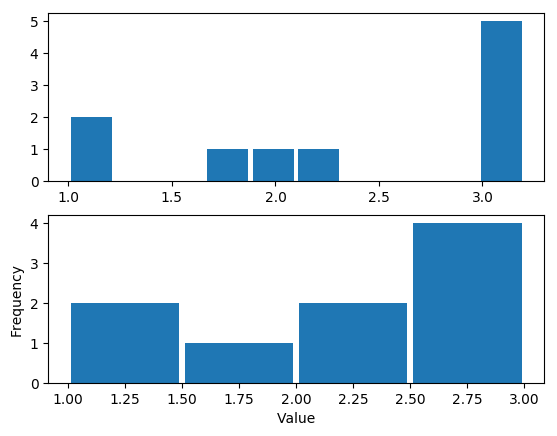

In [32]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.9)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

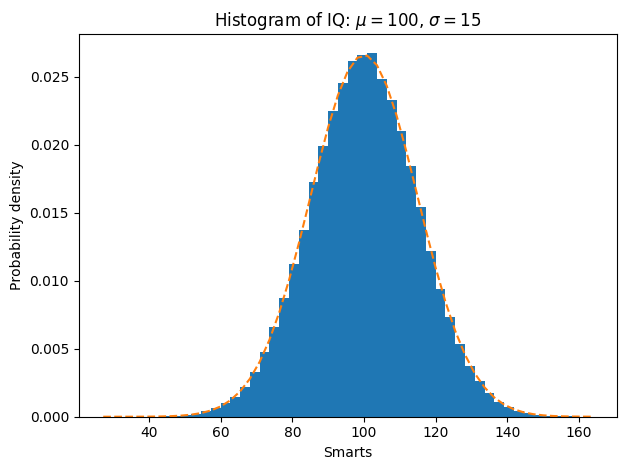

In [33]:
import matplotlib.mlab as mlab

np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(100000)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Images
Reading, generating and plotting images in matplotlib is quite straightforward.

To read an image, just import the matplotlib.image module, and call its imread function, passing it the file name (or file object). This returns the image data, as a NumPy array. Let's try this with the *my_square_function.png* image we saved earlier.

In [34]:
import matplotlib.image as mpimg

img = mpimg.imread('my_square_function.png')
print(img.shape, img.dtype)

(288, 432, 4) float32


We have loaded a 288x432 image. Each pixel is represented by a 4-element array: red, green, blue, and alpha levels, stored as 32-bit floats between 0 and 1. Now all we need to do is to call imshow:

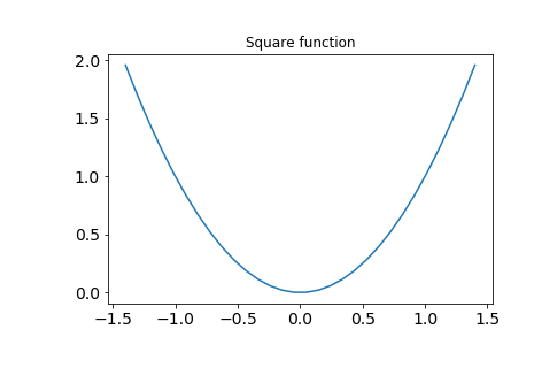

In [35]:
plt.imshow(img)
plt.axis('off')
plt.show()

__Exercise__: Linear regression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


4.00035851560795 0.5117627449628461


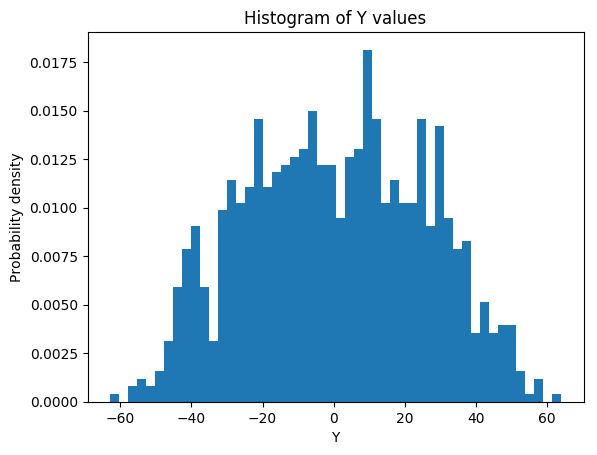

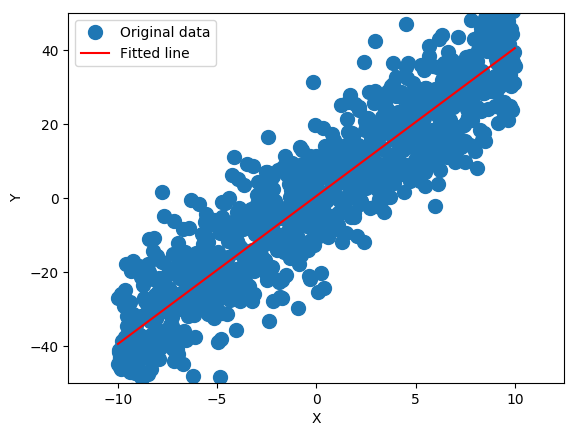

In [36]:
import numpy as np

num_data_points = 1000

x = np.linspace(-10, 10, num_data_points)

mean = 0
std = 10

eps = np.random.normal(mean, std, num_data_points)

y = 4 * x + eps

plt.figure()

# the histogram of the data
n, bins, patches = plt.hist(y, num_bins, normed=1)

# add a 'best fit' line
plt.xlabel('Y')
plt.ylabel('Probability density')
plt.title('Histogram of Y values')


A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print(m, c)

num_bins = 100

plt.figure()

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.ylim([-50, 50])
plt.xlim([-12.5, 12.5])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()